Lecture 122 - Implementing Rich-getting-richer Phenomenon (Barabasi-Albert Model)-2

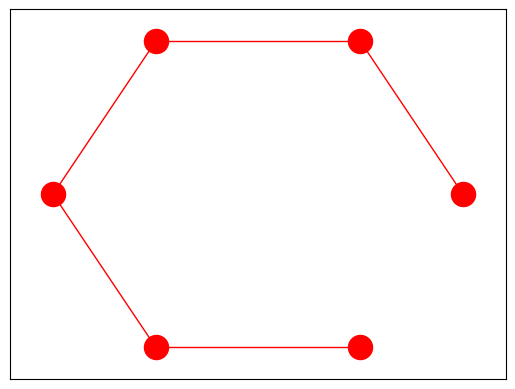

In [8]:
#initial graph
import networkx as nx
import random
import matplotlib.pyplot as plt

def display_graph(G, i, ne):
    pos = nx.circular_layout(G)  # Generate circular layout
    if i == '' and ne == '':
        new_node = []
        rest_nodes = G.nodes()
        new_edges = []
        rest_edges = G.edges()
    else:
        new_node = [i]
        rest_nodes = list(set(G.nodes()) - set(new_node))
        new_edges = ne
        rest_edges = list(set(G.edges()) - set(new_edges) - set([(b, a) for (a, b) in new_edges]))

    # Draw the nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=new_node, node_color='green')    
    nx.draw_networkx_nodes(G, pos, nodelist=rest_nodes, node_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=new_edges, edge_color='green', style='dashdot')
    nx.draw_networkx_edges(G, pos, edgelist=rest_edges, edge_color='red')

    plt.show()

def main():
    n = int(input("Enter the value of n: "))
    m0 = random.randint(2, n // 5)
    G = nx.path_graph(m0)
    m = m0 - 1

    display_graph(G, '', '')

main()


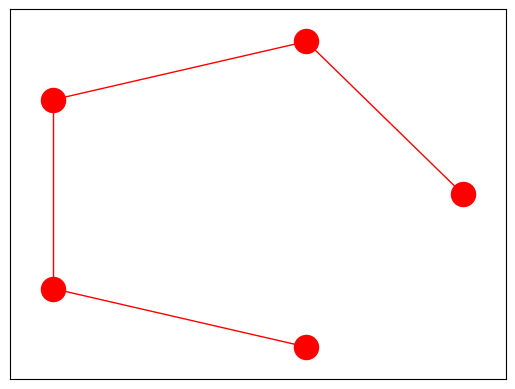

4 edges added to node 6


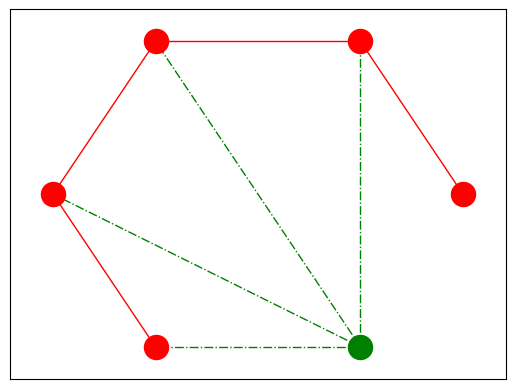

4 edges added to node 7


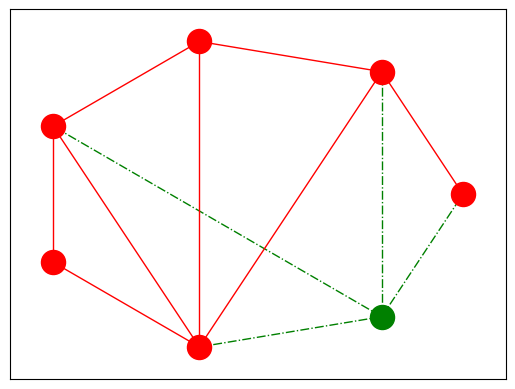

4 edges added to node 8


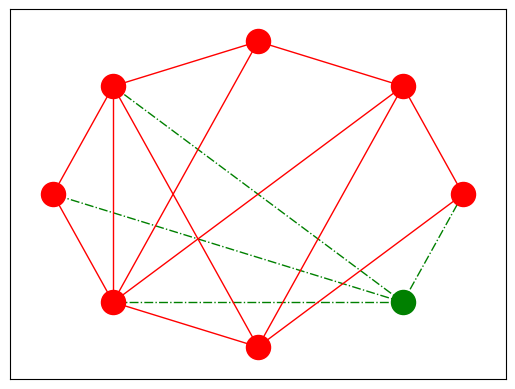

4 edges added to node 9


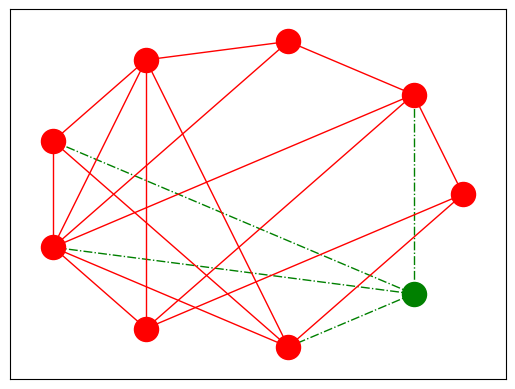

4 edges added to node 10


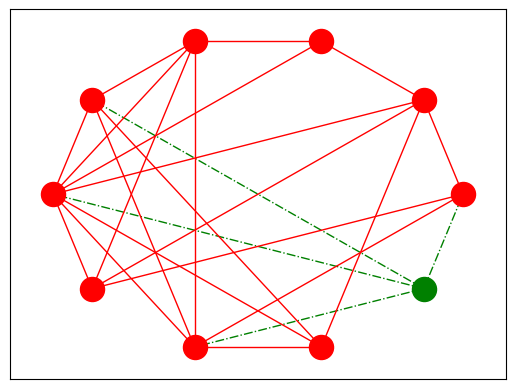

4 edges added to node 11


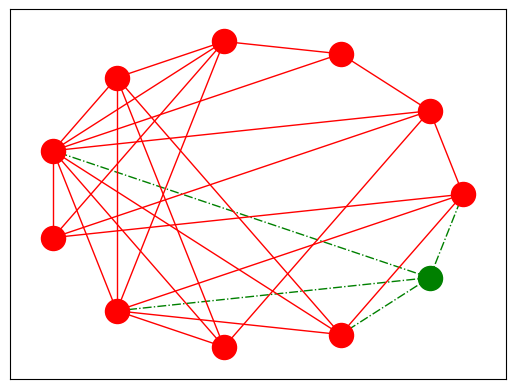

4 edges added to node 12


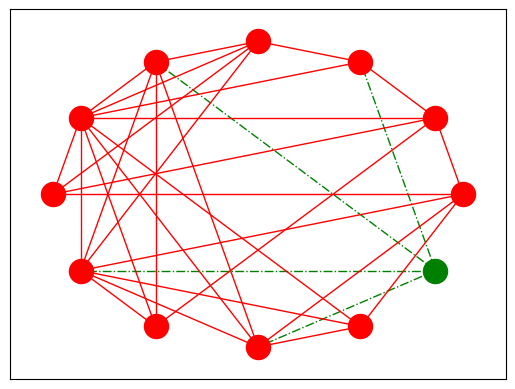

4 edges added to node 13


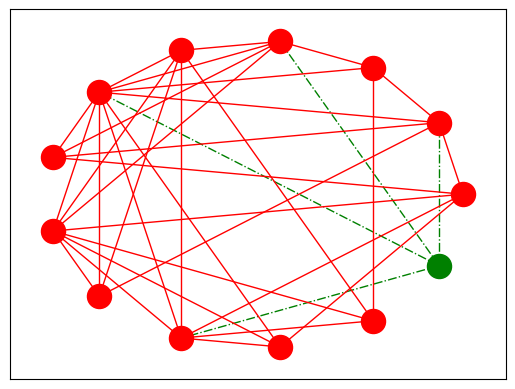

4 edges added to node 14


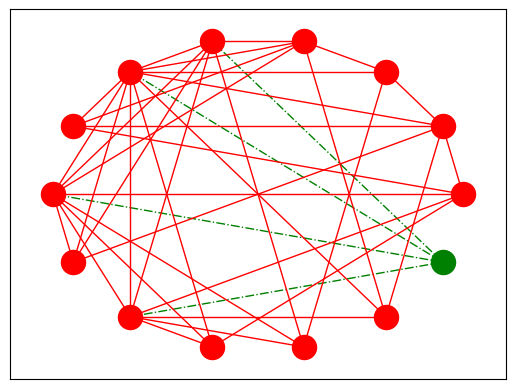

4 edges added to node 15


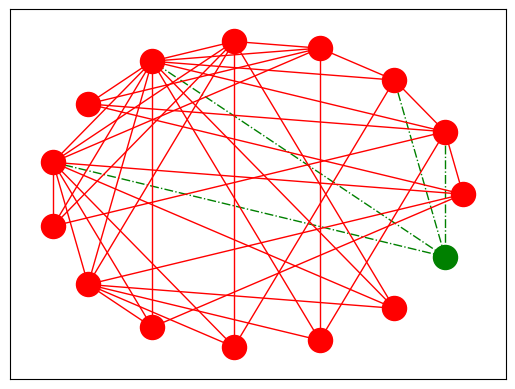

4 edges added to node 16


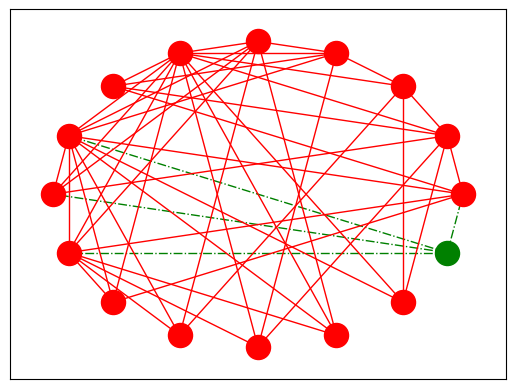

4 edges added to node 17


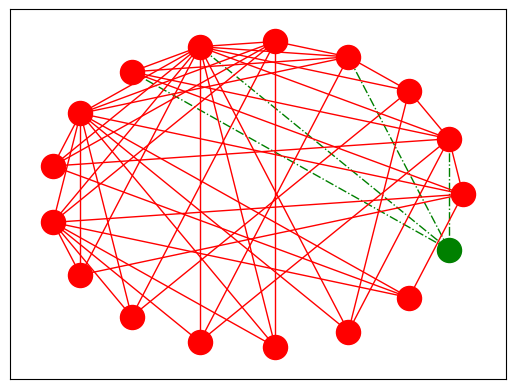

4 edges added to node 18


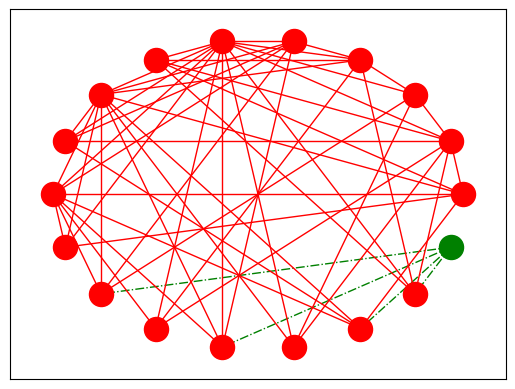

4 edges added to node 19


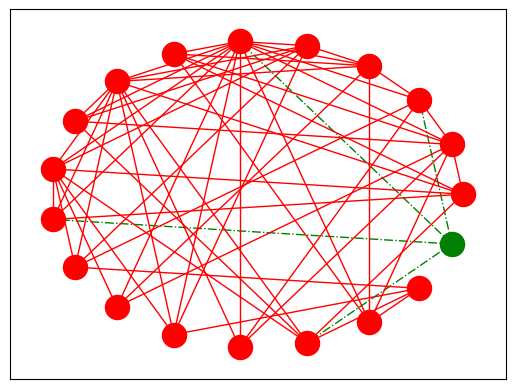

4 edges added to node 20


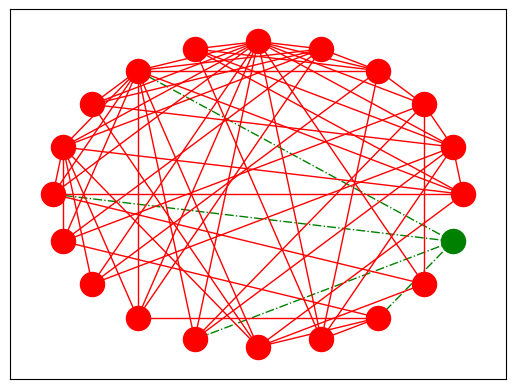

4 edges added to node 21


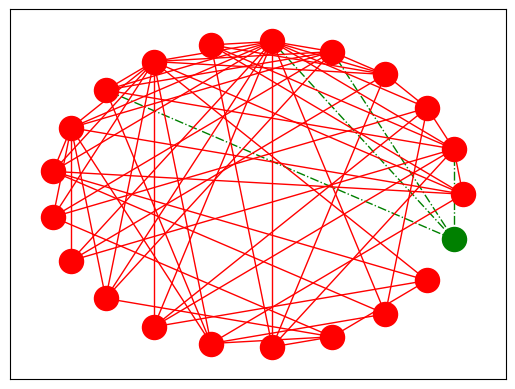

4 edges added to node 22


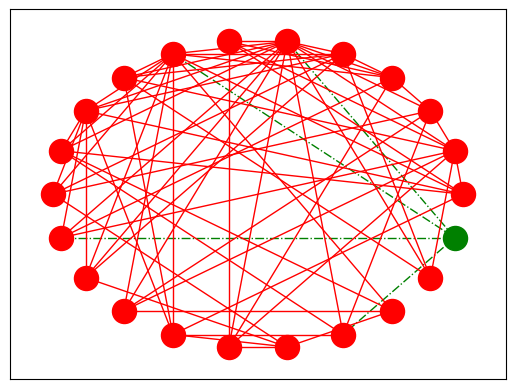

4 edges added to node 23


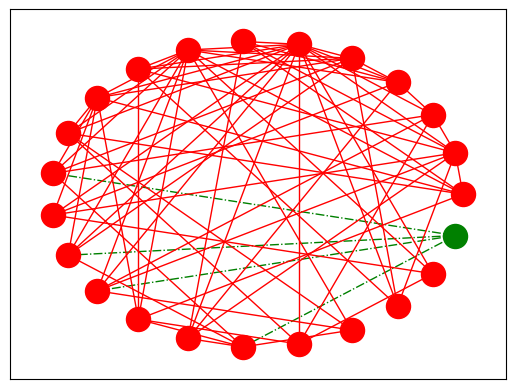

4 edges added to node 24


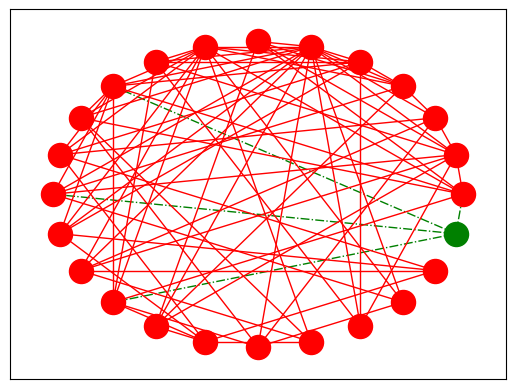

4 edges added to node 25


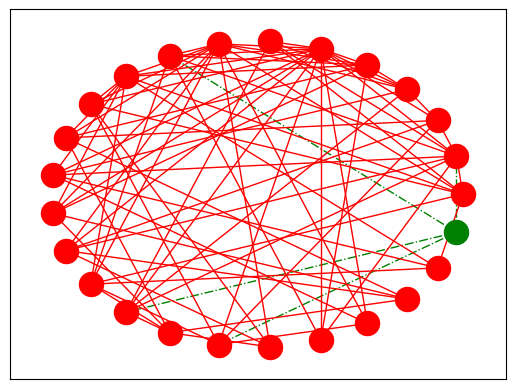

4 edges added to node 26


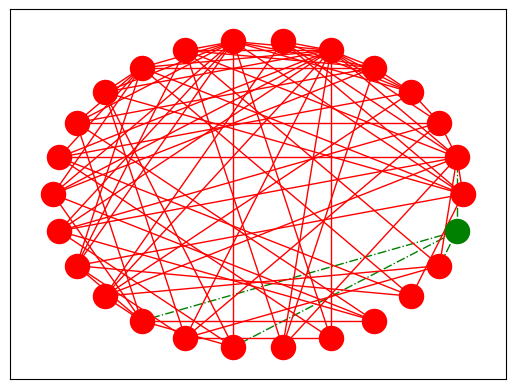

4 edges added to node 27


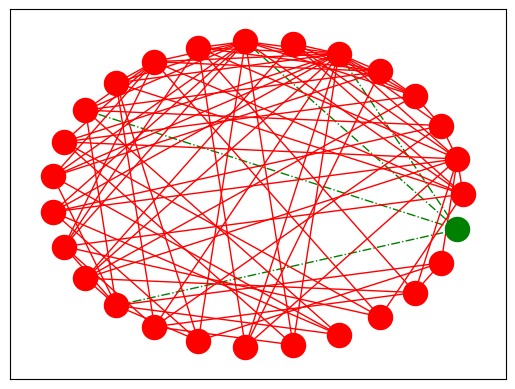

4 edges added to node 28


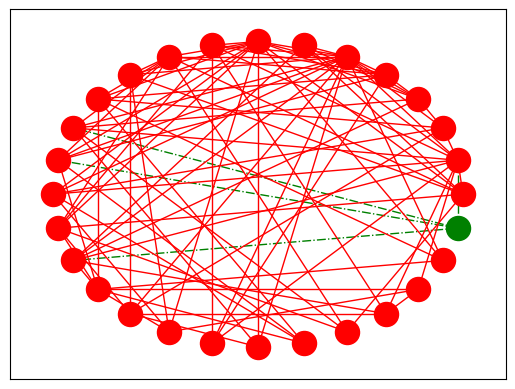

4 edges added to node 29


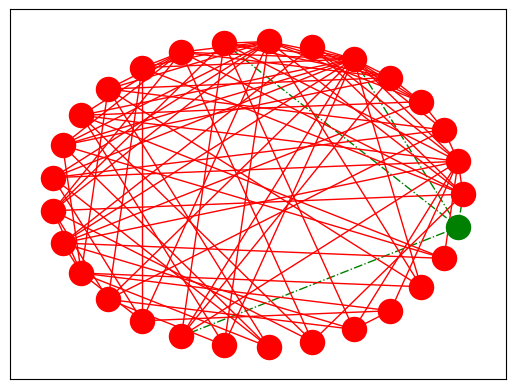

4 edges added to node 30


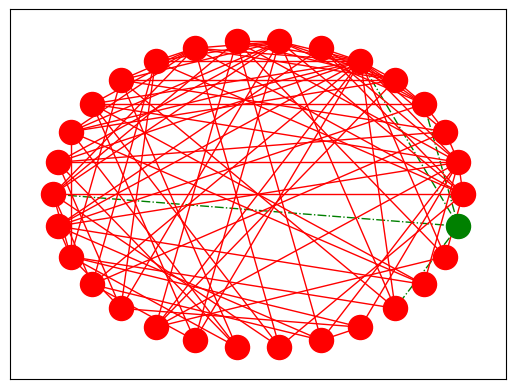

4 edges added to node 31


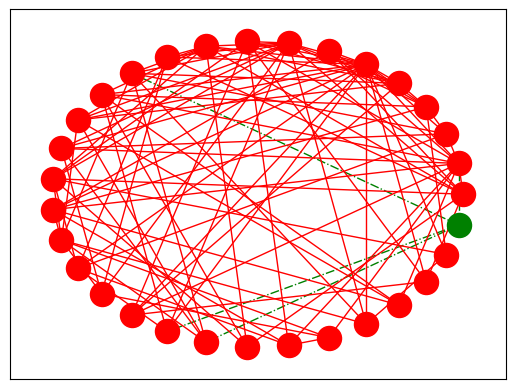

4 edges added to node 32


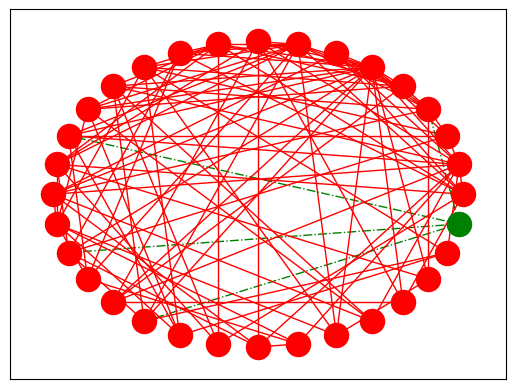

4 edges added to node 33


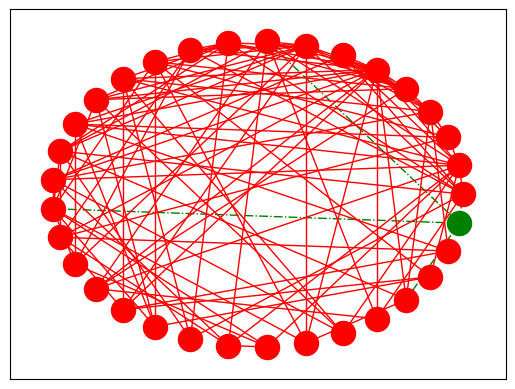

4 edges added to node 34


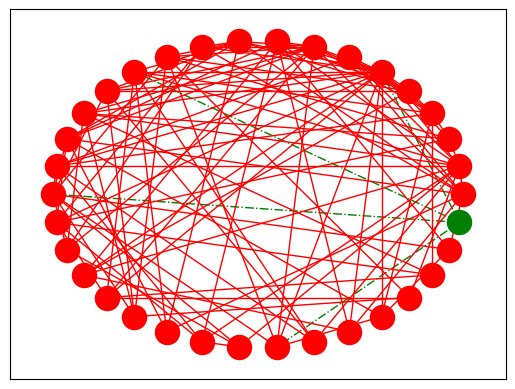

4 edges added to node 35


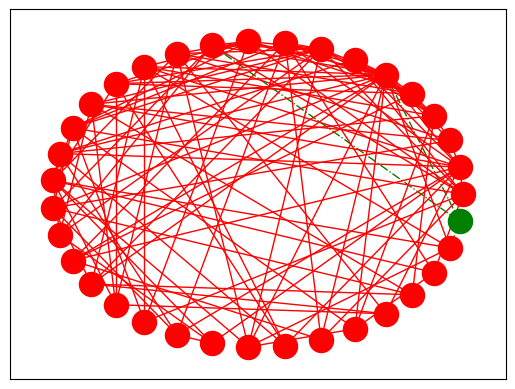

4 edges added to node 36


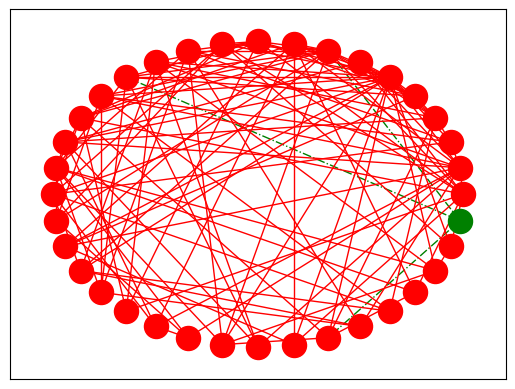

4 edges added to node 37


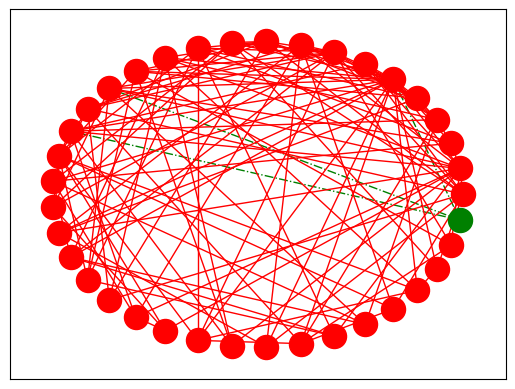

4 edges added to node 38


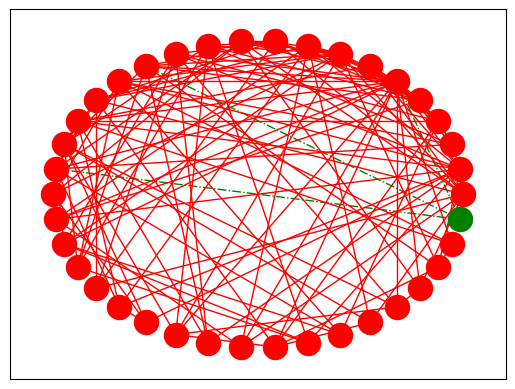

4 edges added to node 39


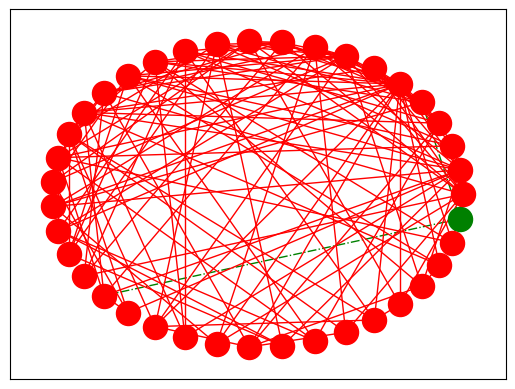

4 edges added to node 40


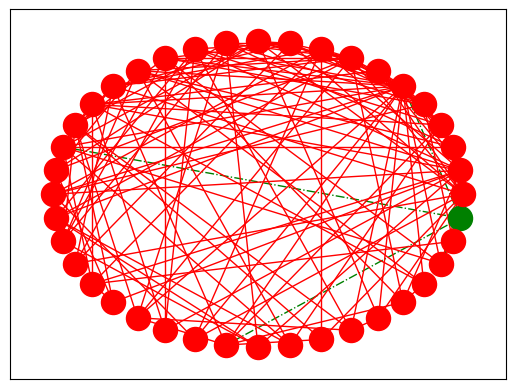

4 edges added to node 41


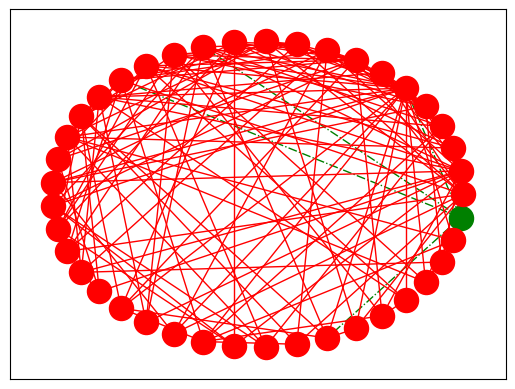

4 edges added to node 42


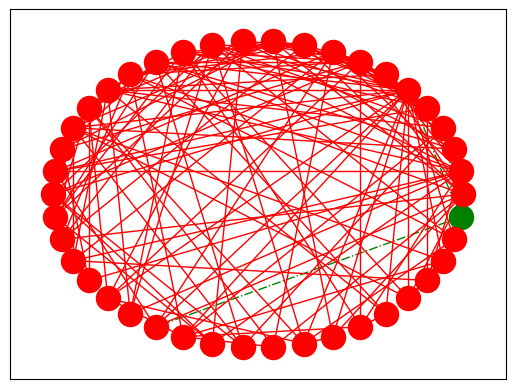

4 edges added to node 43


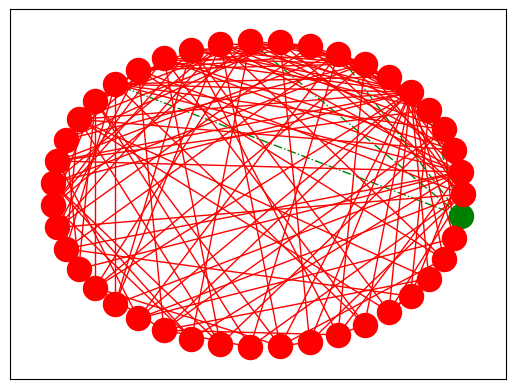

4 edges added to node 44


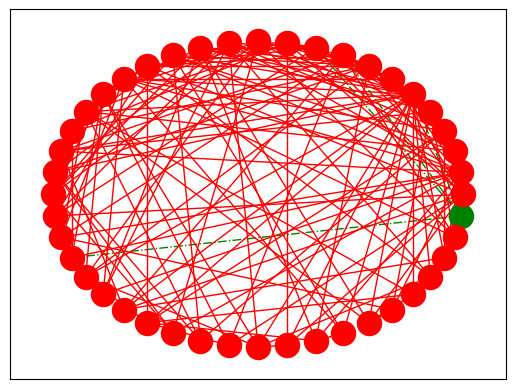

4 edges added to node 45


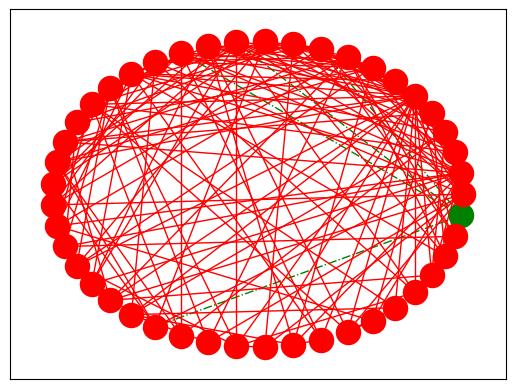

4 edges added to node 46


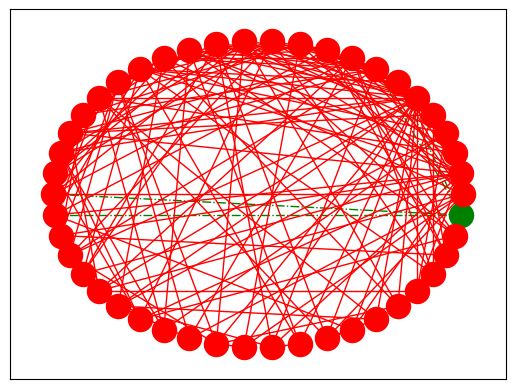

4 edges added to node 47


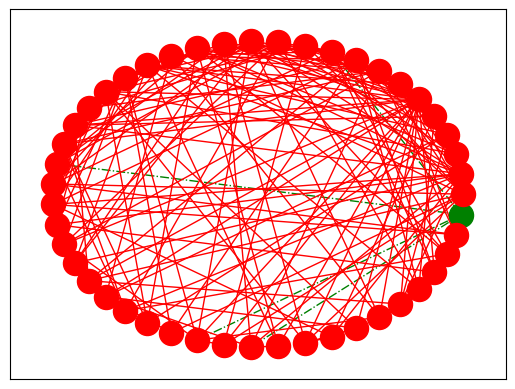

4 edges added to node 48


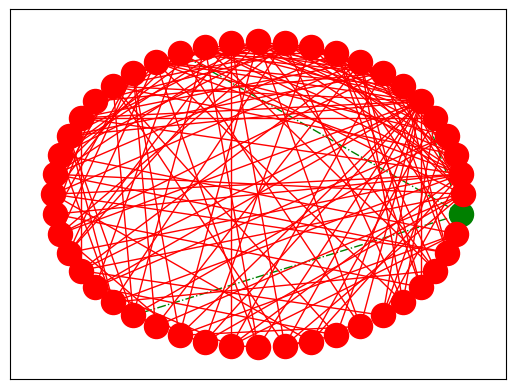

4 edges added to node 49


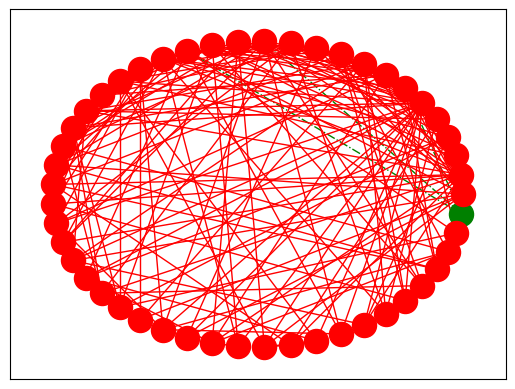

4 edges added to node 50


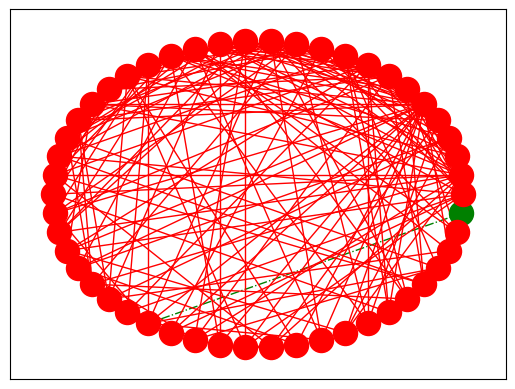

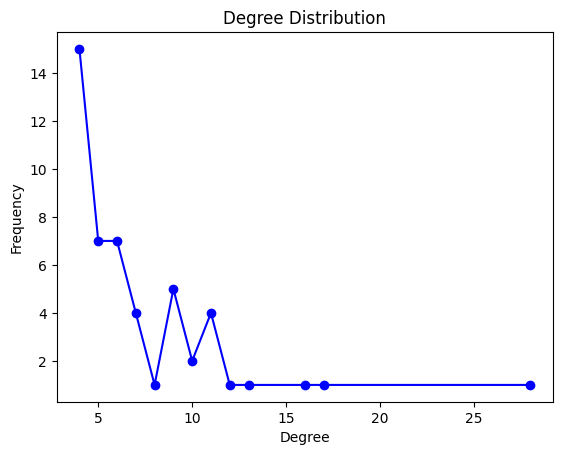

In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def display_graph(G, i, ne):
    pos = nx.circular_layout(G)  # Generate circular layout
    if i == '' and ne == '':
        new_node = []
        rest_nodes = G.nodes()
        new_edges = []
        rest_edges = G.edges()
    else:
        new_node = [i]
        rest_nodes = list(set(G.nodes()) - set(new_node))
        new_edges = ne
        rest_edges = list(set(G.edges()) - set(new_edges) - set([(b, a) for (a, b) in new_edges]))

    # Draw the nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=new_node, node_color='green')    
    nx.draw_networkx_nodes(G, pos, nodelist=rest_nodes, node_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=new_edges, edge_color='green', style='dashdot')
    nx.draw_networkx_edges(G, pos, edgelist=rest_edges, edge_color='red')

    plt.show()

def add_nodes_barabasi(G, n, m0):
    m = m0 - 1
    for i in range(m0 + 1, n + 1):
        G.add_node(i)
        
        # Get degrees of nodes and set up probabilities
        degrees = dict(G.degree())
        nodes = list(degrees.keys())
        weights = list(degrees.values())
        
        # Normalize weights (probabilities)
        total_weight = sum(weights)
        probabilities = [w / total_weight for w in weights]

        new_edges = []
        target_nodes = set()

        # Select 'm' distinct nodes based on their degree probabilities
        while len(target_nodes) < m:
            target_node = random.choices(nodes, probabilities, k=1)[0]
            if target_node not in target_nodes:
                target_nodes.add(target_node)
                G.add_edge(i, target_node)
                new_edges.append((i, target_node))

        print(len(new_edges), "edges added to node", i)

        display_graph(G, i, new_edges)

    return G

def plot_deg_dist(G):
    # Convert DegreeView to a dictionary and get the degree values
    all_degrees = dict(nx.degree(G)).values()
    
    # Get unique degrees
    unique_degrees = list(set(all_degrees))
    
    # Count how many times each unique degree occurs
    count_of_degrees = []
    for degree in unique_degrees:
        count_of_degrees.append(list(all_degrees).count(degree))
    
    # Plot the degree distribution
    plt.plot(unique_degrees, count_of_degrees, 'bo-')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

def main():
    n = int(input("Enter the value of n: "))
    m0 = random.randint(2, n // 5)
    G = nx.path_graph(m0)

    display_graph(G, '', '')
    G = add_nodes_barabasi(G, n, m0)
    plot_deg_dist(G)
    
main()


Lecture 124 - Implementing a Random Graph (Erdos- Renyi Model)-2

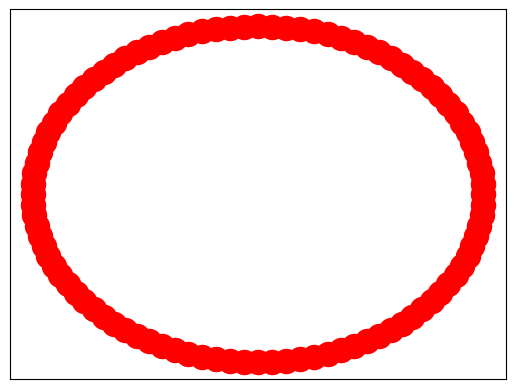

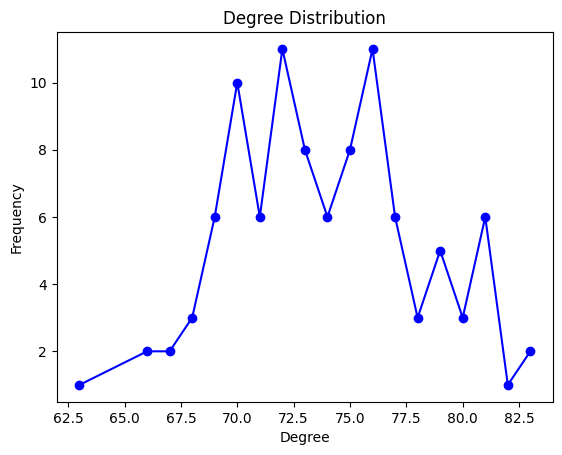

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def display_graph(G, i, ne):
    pos = nx.circular_layout(G)  # Generate circular layout
    if i == '' and ne == '':
        new_node = []
        rest_nodes = G.nodes()
        new_edges = []
        rest_edges = G.edges()
    elif i=='':
        # new_node = [i]
        # rest_nodes = list(set(G.nodes()) - set(new_node))
        rest_nodes = G.nodes()
        new_edges = ne
        rest_edges = list(set(G.edges()) - set(new_edges) - set([(b, a) for (a, b) in new_edges]))
       
    # Draw the nodes and edges
    # nx.draw_networkx_nodes(G, pos, nodelist=new_node, node_color='green')    
    nx.draw_networkx_nodes(G, pos, nodelist=rest_nodes, node_color='red')
    nx.draw_networkx_edges(G, pos, edgelist=new_edges, edge_color='green', style='dashdot')
    nx.draw_networkx_edges(G, pos, edgelist=rest_edges, edge_color='red')

    plt.show()

def erdos_renyi(G,p):
    for i in G.nodes():
        for j in G.nodes():
            if i!=j:
                r=random.random()
                if r<=p:
                    G.add_edge(i,j)
                    ne=[(i,j)]
                    # display_graph(G, '', ne)
                else:
                    ne=[(i,j)]
                    # display_graph(G, '', ne)
                    continue
def plot_deg_dist(G):
    # Convert DegreeView to a dictionary and get the degree values
    all_degrees = dict(nx.degree(G)).values()
    
    # Get unique degrees
    unique_degrees = list(set(all_degrees))
    
    # Count how many times each unique degree occurs
    count_of_degrees = []
    for degree in unique_degrees:
        count_of_degrees.append(list(all_degrees).count(degree))
    
    # Plot the degree distribution
    plt.plot(unique_degrees, count_of_degrees, 'bo-')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.show()

def main():
    #Take n, i.e, total number of nodes,from the user.
    n = int(input("Enter the value of n: "))
    #Take p, i.e, total value of probability from the user.
    p = float(input("Enter the value of p: "))
    #create an empty graph. Add n nodes to it.
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])
    #Add edges to the graph randomly.
    display_graph(G,'','')
    erdos_renyi(G,p)
    plot_deg_dist(G)

main()
    

Lecture 125 - Forced Versus Random Removal of Nodes (Attack Survivability)

In [5]:
import networkx as nx
import random

def main():
    G=nx.read_edgelist('D:/SN/facebook_combined.txt')
    print(nx.info(G))

main()

Graph with 4039 nodes and 88234 edges


C:\Users\HP\AppData\Local\Temp\ipykernel_18980\2569329024.py:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


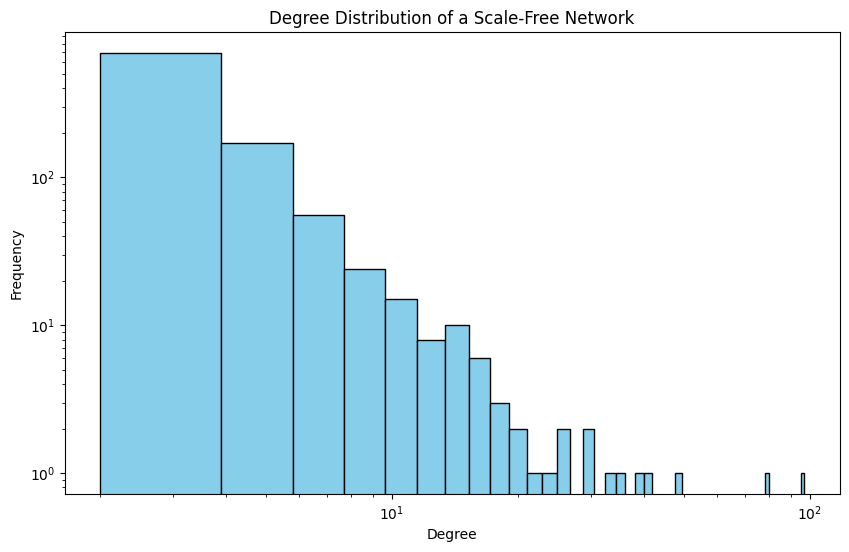

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a scale-free network using Barabási-Albert model
n = 1000  # Number of nodes
m = 2     # Each new node attaches to 2 existing nodes

# Create a scale-free network using preferential attachment
G = nx.barabasi_albert_graph(n, m)

# Calculate degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # Degree sequence

# Plot degree distribution on a log-log scale to see if it follows a power law
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, log=True, color='skyblue', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of a Scale-Free Network")
plt.yscale("log")
plt.xscale("log")
plt.show()


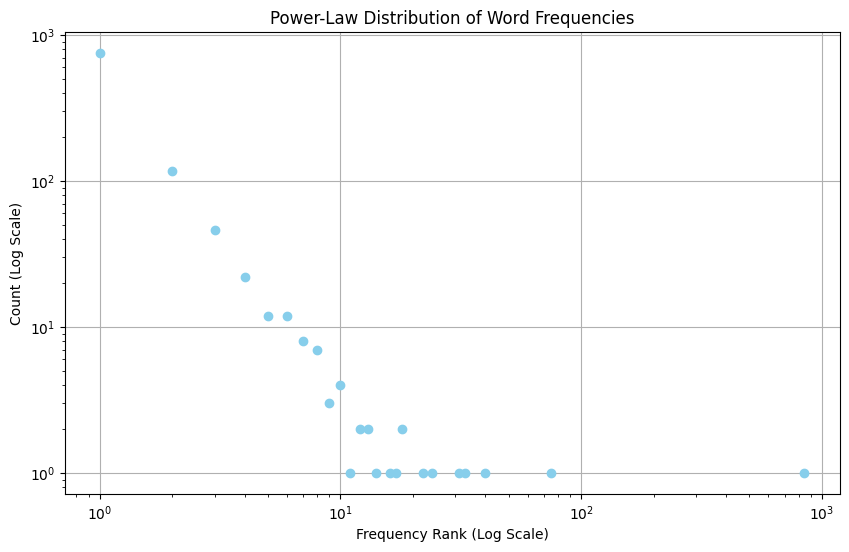

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import collections

# Number of unique words
unique_words = 1000

# Power law exponent (closer to 2 gives more common high-frequency words)
exponent = 2.5

# Generate word frequencies following a power law
frequencies = np.random.zipf(exponent, unique_words)

# Count frequency of each frequency value
frequency_counts = collections.Counter(frequencies)

# Sort and split frequency counts for plotting
freq, count = zip(*sorted(frequency_counts.items()))

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.loglog(freq, count, marker="o", color="skyblue", linestyle="none")
plt.xlabel("Frequency Rank (Log Scale)")
plt.ylabel("Count (Log Scale)")
plt.title("Power-Law Distribution of Word Frequencies")
plt.grid(True)
plt.show()


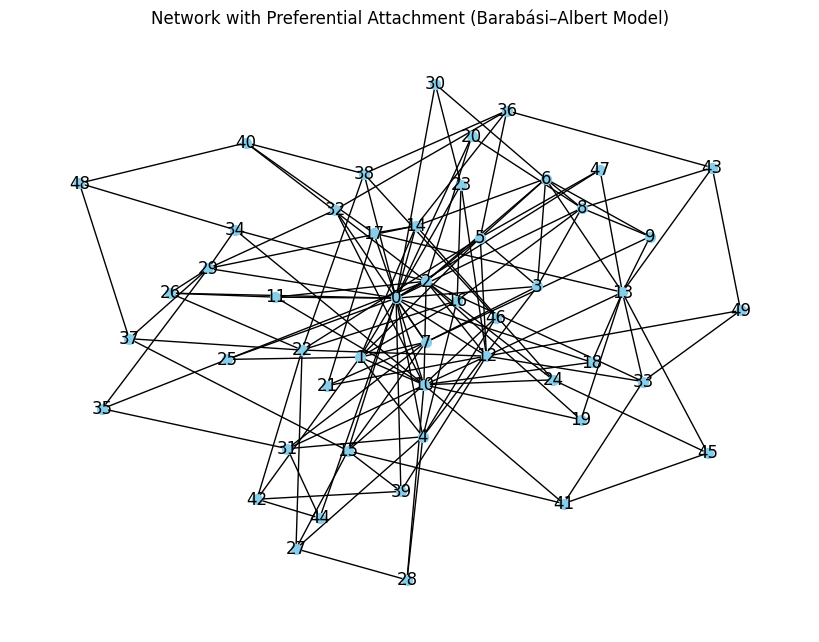

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes in the network and the number of connections each new node will make
n_nodes = 50
m_connections = 3

# Create a network using preferential attachment
G = nx.barabasi_albert_graph(n=n_nodes, m=m_connections)

# Draw the network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=50, node_color="skyblue", with_labels=True)
plt.title("Network with Preferential Attachment (Barabási–Albert Model)")
plt.show()
